Low-dimensional Embedding of Time-varying Connectivity
--

In [1]:
import numpy as np 

import os 
datapath = '/Users/nicolasfarrugia/Documents/recherche/data_mpilmbb/'

from matplotlib import pyplot as plt 

%matplotlib inline

In [31]:
all_sim = np.load(os.path.join(datapath,'FC_variability.npz'))['all_cosine_sim']

In [32]:
all_sim.shape

(40, 572, 572)

In [33]:
from sklearn.manifold import SpectralEmbedding

ncomp= 2 

manif = SpectralEmbedding(n_components=ncomp)

lowdim_fc = np.ndarray((all_sim.shape[0],all_sim.shape[1],ncomp))

for i,cursim in enumerate(all_sim):
    

    lowdim_fc[i] = manif.fit_transform(cursim)

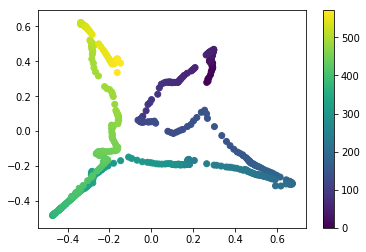

In [34]:
subj = 15

plt.scatter(lowdim_fc[subj,:,0],lowdim_fc[subj,:,1],c=np.arange(lowdim_fc.shape[1]))
plt.colorbar()

Load cluster labels 

In [35]:
centroids = np.load(os.path.join(datapath,"kmeans_results.npz"))['centroids']
clustlabels = np.load(os.path.join(datapath,"kmeans_results.npz"))['labels']

In [36]:
clustlabels.shape

(40, 572)

Represent cluster labels on Low dimensional embedding 

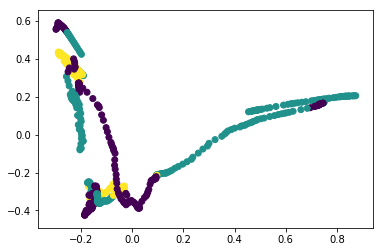

In [43]:
subj = 10

plt.scatter(lowdim_fc[subj,:,0],lowdim_fc[subj,:,1],c=clustlabels[subj])

Add Network Change Point Detection

In [47]:
subj = 22 # Subject 22 doesnt have NCP

permut = np.load(os.path.join(datapath,"NCPD_results.npz"))['permuts']

stat = np.load(os.path.join(datapath,"NCPD_results.npz"))['stat']



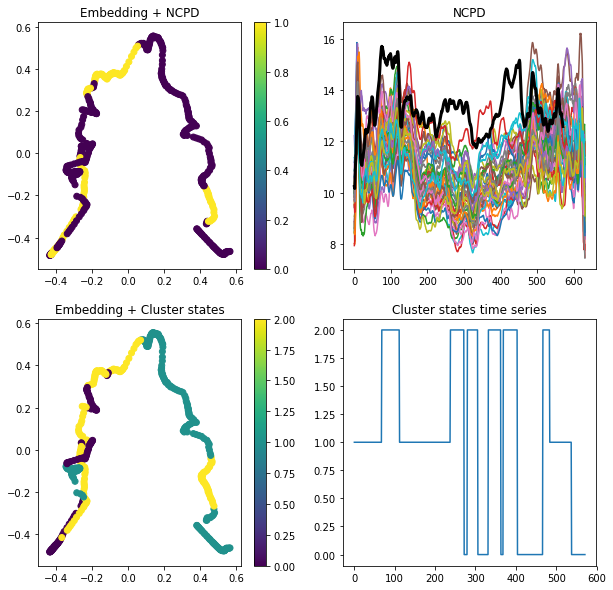

In [99]:
subj = 0

stat = np.load(os.path.join(datapath,"NCPD_results.npz"))['stat']
perms = np.load(os.path.join(datapath,"NCPD_results.npz"))['permuts']

maxofperms = np.max(perms,axis=0)

stat_ncpd = stat[:,:572]

#stat_ncpd[stat_ncpd>=14] = 1
#stat_ncpd[stat_ncpd<14] = 0

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(lowdim_fc[subj,:,0],lowdim_fc[subj,:,1],c=stat_ncpd.ravel()>maxofperms[:572])
plt.colorbar()
plt.title('Embedding + NCPD')
plt.subplot(2,2,2)
plt.plot(perms[:40,:].T)
plt.plot(stat_ncpd.ravel(), color='k', linewidth=3)
plt.title('NCPD')
plt.subplot(2,2,3)
plt.scatter(lowdim_fc[subj,:,0],lowdim_fc[subj,:,1],c=clustlabels[subj])
plt.colorbar()
plt.title('Embedding + Cluster states')
plt.subplot(2,2,4)
plt.plot(clustlabels[subj])
plt.title('Cluster states time series')
plt.show()

In [102]:
cor1 = np.load(os.path.join(datapath,"ncpd_states.npz"))['state1']
cor2 = np.load(os.path.join(datapath,"ncpd_states.npz"))['state2']